In [38]:
import numpy as np
import pandas as pd

In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Make Ensemble Submission')
parser.add_argument('--name', help='Name of Kaggle Submission')
parser.add_argument('--models', nargs='+', help='List of models')
args, unknown_args = parser.parse_known_args()


In [ ]:
probs = []
probs_ens = None

for model in args.models:
    prob = np.load("CatVsDogs.Xt.{}.npy".format(model))
    probs.append(prob)

probs_ens = probs[0]
for prob in probs[1:]:
    probs_ens += prob

probs_ens /= len(probs)

submission = np.hstack((np.arange(1, probs_ens.shape[0]+1, 1).reshape(-1, 1), probs_ens[:, 0].reshape(-1,1)))
df_submission = pd.DataFrame(submission, columns=["id", "label"])
df_submission["id"] = df_submission["id"].astype(np.int)
df_submission.to_csv("submission_{}.csv".format(args.name), index=False)

In [2]:
df_submission = pd.read_csv('submission_inception_resnet_ensemble_deep_fc_fulldata_inception_v3_256.csv')

In [25]:
df_uncertain = df_submission[(df_submission.label <0.55) & (df_submission.label > 0.45)].reset_index(drop=True)

In [4]:
import CatVsDogs
import matplotlib.pyplot as plt

ids, Xt = CatVsDogs.prepare_test_data()

%matplotlib inline

flatten = lambda l: [item for sublist in l for item in sublist]

In [ ]:
def gridview(df):
    fig, axes = plt.subplots(np.ceil(df.shape[0] / 4).astype(np.int), 4, figsize=(10,10))
    axes = flatten(axes)

    for idx, ax in enumerate(axes):
        if idx >= df.shape[0]:
            ax.axis('off')
            continue

        image_idx = df.loc[idx, 'id'] - 1
        ax.imshow(Xt[image_idx])
        ax.set_title("LABEL: {}".format(df.loc[idx, 'label']))

    # plt.tight_layout()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


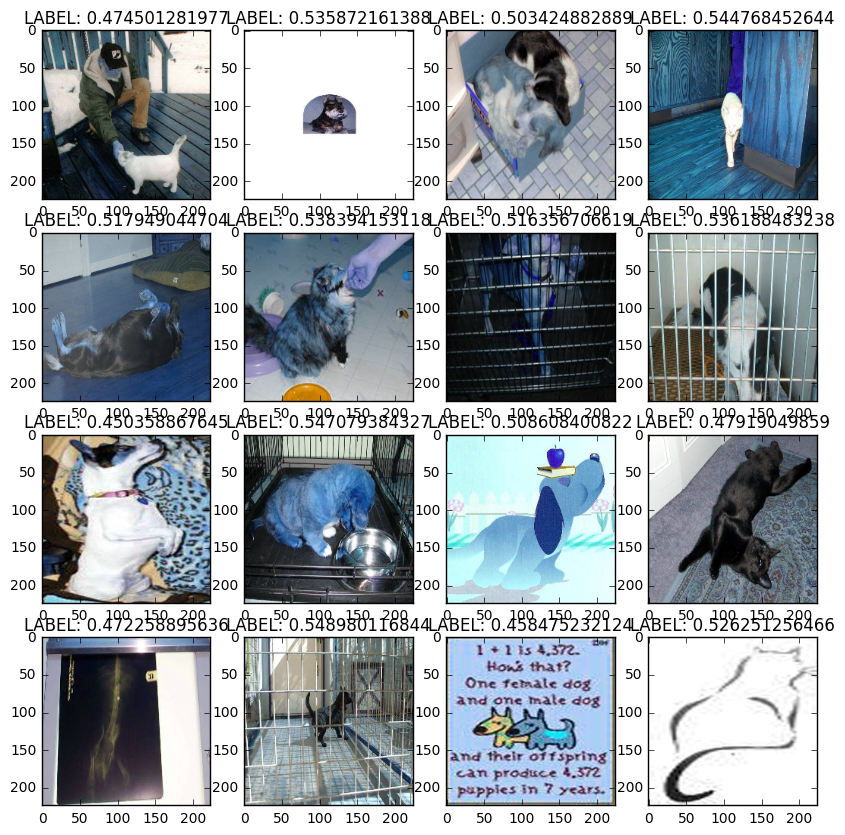

In [27]:
def showim(i):
    image_idx = df_uncertain.loc[i, 'id'] - 1
    plt.imshow(Xt[image_idx])
    plt.title("LABEL: {}".format(df_uncertain.loc[i, 'label']))